In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import talib

# Đọc dữ liệu
file_path = r'D:\startup\fx\merged_data_files.csv'
data = pd.read_csv(file_path)
# Đổi tên cột
data.columns = ['ngay', 'gio', 'Open', 'High', 'Low', 'Close', 'Volume']
# Kết hợp hai cột ngày và giờ
data['timestamp'] = pd.to_datetime(data['ngay'] + ' ' + data['gio'])
# Xóa hai cột ngay và gio ban đầu
data.drop(columns=['ngay', 'gio'], inplace=True)
# Đặt cột timestamp làm index
data.set_index('timestamp', inplace=True)
# Sắp xếp dữ liệu theo thời gian
data.sort_index(inplace=True)

In [65]:
#Tính toán các chỉ báo kỹ thuật
data['SMA'] = talib.SMA(data['Close'], timeperiod=20)
data['EMA'] = talib.EMA(data['Close'], timeperiod=20)
data['RSI'] = talib.RSI(data['Close'], timeperiod=14)
data['Bollinger_High'], data['Bollinger_Mid'], data['Bollinger_Low'] = talib.BBANDS(data['Close'], timeperiod=20)
data['MACD'], data['MACD_Signal'], data['MACD_Hist'] = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Xóa các hàng có giá trị NaN trong nhãn
data = data.dropna()

# Khám phá dữ liệu
print(data.head())


                        Open     High      Low    Close  Volume       SMA  \
timestamp                                                                   
2024-01-01 17:37:00  1.10431  1.10432  1.10431  1.10431       0  1.104298   
2024-01-01 17:38:00  1.10431  1.10432  1.10431  1.10432       0  1.104299   
2024-01-01 17:39:00  1.10431  1.10435  1.10431  1.10431       0  1.104299   
2024-01-01 17:40:00  1.10431  1.10431  1.10431  1.10431       0  1.104299   
2024-01-01 17:41:00  1.10431  1.10437  1.10431  1.10432       0  1.104304   

                          EMA        RSI  Bollinger_High  Bollinger_Mid  \
timestamp                                                                 
2024-01-01 17:37:00  1.104300  53.148588        1.104298       1.104298   
2024-01-01 17:38:00  1.104302  55.731822        1.104299       1.104299   
2024-01-01 17:39:00  1.104303  52.608060        1.104299       1.104299   
2024-01-01 17:40:00  1.104303  52.608060        1.104299       1.104299   
2024-01-01

In [66]:

# Tạo features và labels mới sau khi đã xử lý NaN
X = data[['SMA', 'EMA', 'RSI', 'Bollinger_High', 'Bollinger_Low', 'MACD']]
y = data['Close'].shift(-1)

# Loại bỏ hàng cuối cùng nếu vẫn còn NaN sau khi điền
X = X[:-1]
y = y[:-1]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Xây dựng và huấn luyện mô hình
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Đánh giá mô hình
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 2.059499997282818e-08


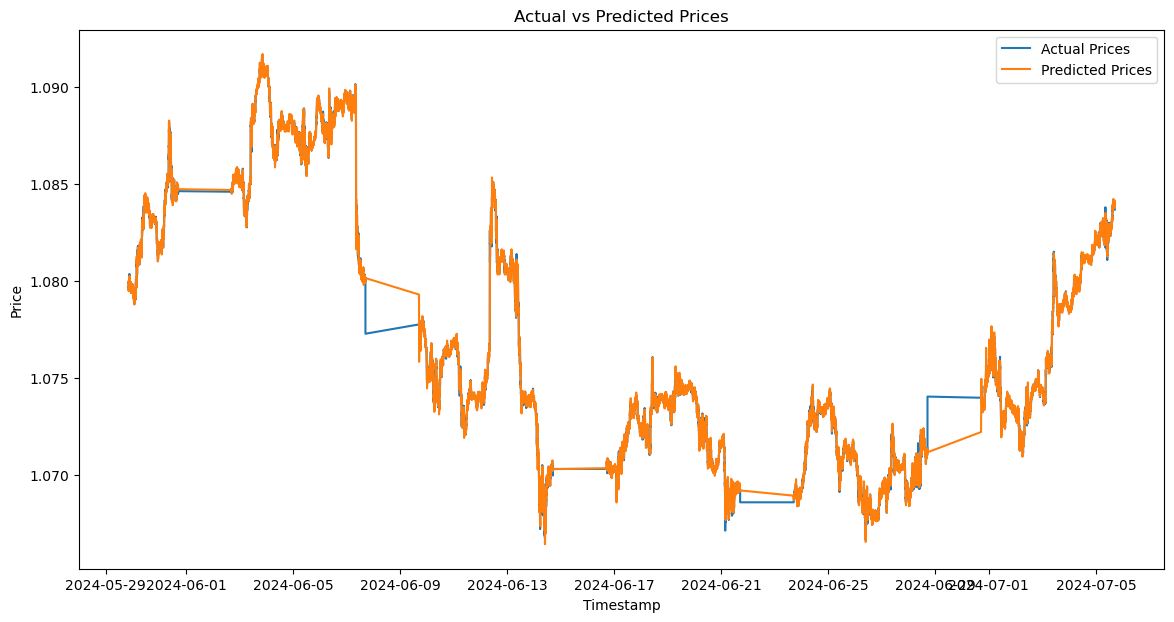

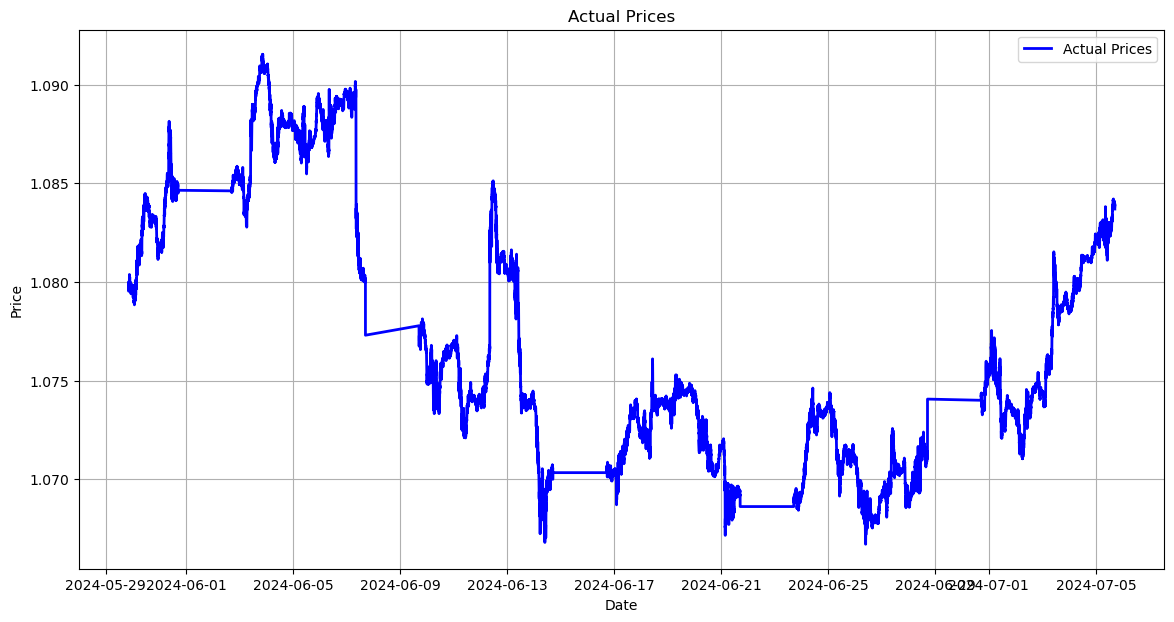

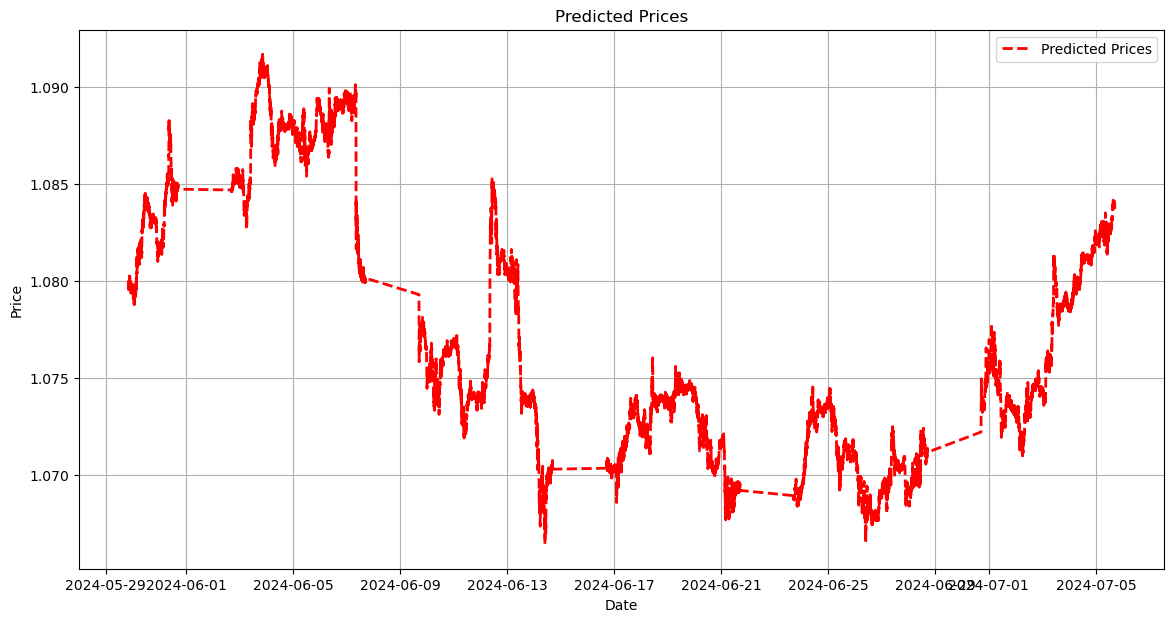

In [68]:
# Hiển thị kết quả dự đoán và giá trị thực tế
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, y_pred, label='Predicted Prices')
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.show()

# Biểu đồ giá thực tế
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual Prices')
plt.legend()
plt.grid(True)
plt.show()

# Biểu đồ giá dự đoán
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()


          Feature  Importance
1             EMA    0.996778
4   Bollinger_Low    0.001302
0             SMA    0.001286
2             RSI    0.000404
3  Bollinger_High    0.000141
5            MACD    0.000090


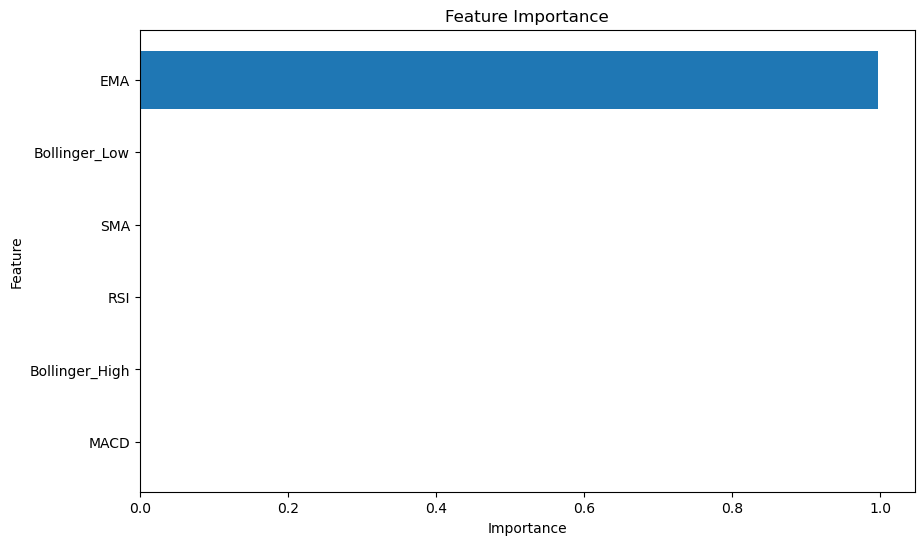

In [69]:
# Hiển thị các đặc trưng quan trọng
feature_importances = model.feature_importances_
features = X.columns

# Tạo DataFrame để hiển thị đặc trưng quan trọng
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Hiển thị bảng các đặc trưng quan trọng
print(importance_df)

# Vẽ biểu đồ các đặc trưng quan trọng
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

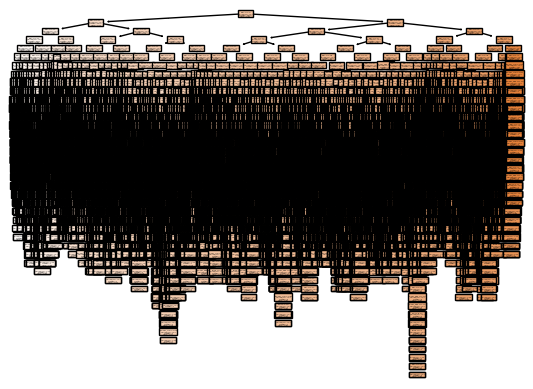

In [70]:
import matplotlib.pyplot as plt

from sklearn import tree
tree.plot_tree(model.estimators_[0], feature_names=X.columns, filled=True)
plt.show()